In [14]:
import numpy as np
import pandas as pd

In [15]:
df = pd.read_csv("Social_Network_Ads.csv")

In [16]:
df.head(1)

User ID Gender  Age  EstimatedSalary  Purchased
0  15624510   Male   19            19000          0

In [17]:
df['Gender'].replace({'Male' : 0, 'Female' : 1}, inplace = True)

In [18]:
df.head(3)

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       0   19            19000          0
1  15810944       0   35            20000          0
2  15668575       1   26            43000          0

In [19]:
X = df.iloc[:, 1:4]
X.head(2)

Gender  Age  EstimatedSalary
0       0   19            19000
1       0   35            20000

In [20]:
y = df.iloc[:, -1]
y.head(2)

0    0
1    0
Name: Purchased, dtype: int64

* Grid Search CV - a library used to perform Hyper Parameter tuning

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()

In [23]:
X1 = sc.fit_transform(X)

In [24]:
X1

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]])

In [25]:
X1 = pd.DataFrame(X1, columns = X.columns)

In [26]:
X1.head()

Gender       Age  EstimatedSalary
0 -1.020204 -1.781797        -1.490046
1 -1.020204 -0.253587        -1.460681
2  0.980196 -1.113206        -0.785290
3  0.980196 -1.017692        -0.374182
4 -1.020204 -1.781797         0.183751

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X1_train, X1_test, y_train, y_test = train_test_split(X1,y, test_size=0.2, random_state=1)

In [29]:
X1_train.shape

(320, 3)

In [30]:
X1_test.shape

(80, 3)

In [31]:
y_train.shape

(320,)

In [32]:
y_test.shape

(80,)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dc = DecisionTreeClassifier()

In [37]:
dc.fit(X1_train, y_train)

DecisionTreeClassifier()

In [38]:
from matplotlib.pylab import rcParams

In [39]:
rcParams ['figure.figsize'] = 40,40

In [40]:
from sklearn.tree import plot_tree

[Text(0.48355263157894735, 0.9642857142857143, 'X[1] <= 0.654\ngini = 0.453\nsamples = 320\nvalue = [209, 111]'),
 Text(0.27631578947368424, 0.8928571428571429, 'X[2] <= 0.61\ngini = 0.275\nsamples = 237\nvalue = [198, 39]'),
 Text(0.15789473684210525, 0.8214285714285714, 'X[1] <= -0.11\ngini = 0.067\nsamples = 201\nvalue = [194, 7]'),
 Text(0.13157894736842105, 0.75, 'gini = 0.0\nsamples = 134\nvalue = [134, 0]'),
 Text(0.18421052631578946, 0.75, 'X[2] <= 0.404\ngini = 0.187\nsamples = 67\nvalue = [60, 7]'),
 Text(0.15789473684210525, 0.6785714285714286, 'X[2] <= -0.066\ngini = 0.142\nsamples = 65\nvalue = [60, 5]'),
 Text(0.13157894736842105, 0.6071428571428571, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.18421052631578946, 0.6071428571428571, 'X[2] <= 0.022\ngini = 0.278\nsamples = 30\nvalue = [25, 5]'),
 Text(0.15789473684210525, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21052631578947367, 0.5357142857142857, 'X[1] <= 0.272\ngini = 0.238\nsam

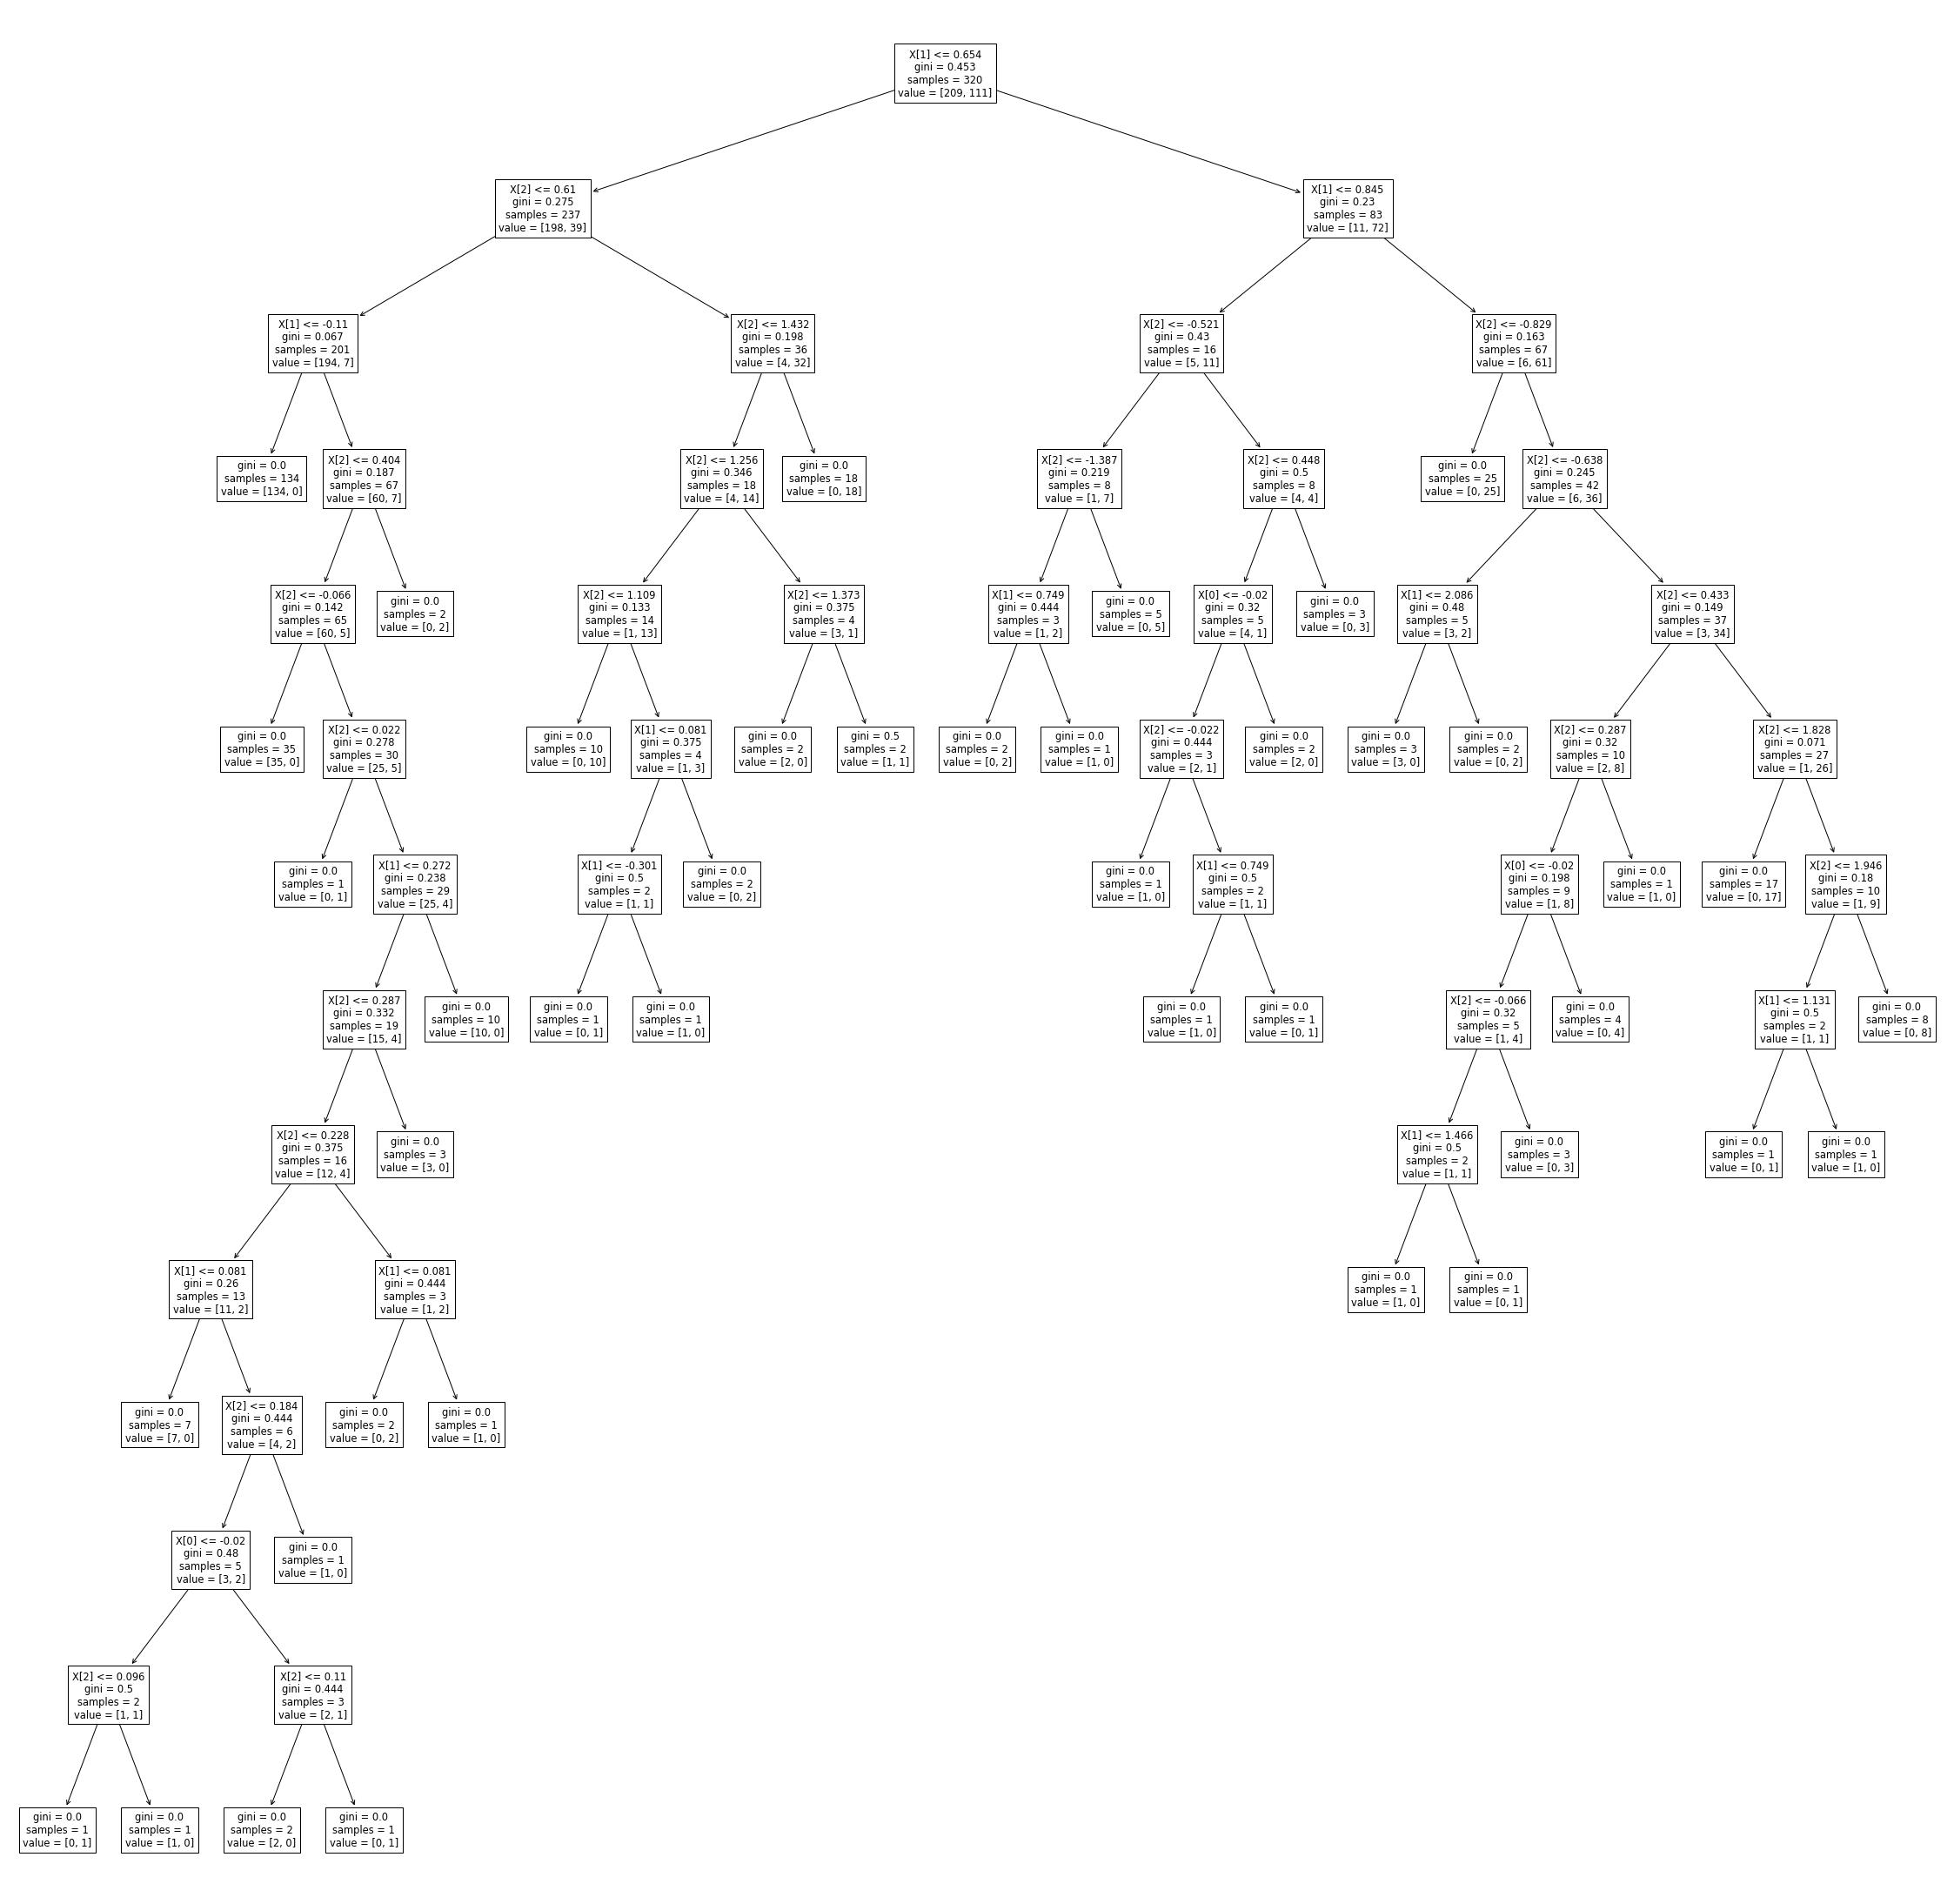

In [41]:
plot_tree(dc)

In [42]:
y_pred = dc.predict(X1_test)

In [43]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test, y_pred)

0.7875

* here, max_depth was None so the accuracy score is 0.78~ 78%. 
* Now we will use GridSearchCV to perform the Hyper parameter tuning (tuning in order to improve the performance, improve the accuracy score).

### GridSearch CV - 

In [47]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : [1,2,3,4,5,6,7, None]
}

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
grid = GridSearchCV(dc, param_grid=param_dist, cv = 10, n_jobs= -1)

In [50]:
grid.fit(X1_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [51]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=2)

In [52]:
grid.best_index_

1

In [53]:
grid.best_score_

0.91875

In [54]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [55]:
grid.error_score

nan

* here, the best score is 91%
* the best parameters that can be used for our model are - gini and max_depth = 2 and not entropy but gini